# Make astro data based on Swiss Ephemeris

In [4]:
%matplotlib inline
import csv
import datetime
import pytz
import swisseph as swe
import pandas as pd
import matplotlib.pyplot as plt
import pytz

## Prepare constans

In [5]:
CSV_IN = '../data/slask-police.csv'
CSV_OUT = '../data/slask-police+astro.csv'

utc = pytz.utc
pl_zone = pytz.timezone('Europe/Warsaw')

header = ['Data', 'Rozboje', 'Bójki i pobicia', 'Kradzieże z włamaniem', 'Kradzieże',
          'Wypadki drogowe', 'Zabici w wypadkach', 'Ranni w wypadkach', 'Nietrzeźwi kierujący', 'Kolizje drogowe',
          'Sun', 'Moon',
          'Mercury', 'Mercury speed',
          'Mars', 'Mars speed', 
          'Uran', 'Uran speed',
          'MoonSun distance',
          'MercuryMars distance',
          'SunMars distance',
          'SunUran distance']
rows = []

## Astro calculations and new csv

In [6]:
with open(CSV_IN) as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        localTime = pl_zone.localize(datetime.datetime.strptime(row[0] + ' 12:00', '%d.%m.%Y %H:%M'))
        utcTime = utc.normalize(localTime)
        jd = swe.julday(utcTime.year, utcTime.month, utcTime.day, utcTime.hour + utcTime.minute / 60, 1)
        
        posSun = swe.calc_ut(jd, swe.SUN)[0]
        posMoon = swe.calc_ut(jd, swe.MOON)[0]
        row.append(round(posSun,2))
        row.append(round(posMoon,2))
        
        posMercury = swe.calc_ut(jd, swe.MERCURY)[0]
        speedMercury = swe.calc_ut(jd, swe.MERCURY)[3]
        posMars = swe.calc_ut(jd, swe.MARS)[0]
        speedMars = swe.calc_ut(jd, swe.MARS)[3]  
        posUran = swe.calc_ut(jd, swe.URANUS)[0]
        speedUran = swe.calc_ut(jd, swe.URANUS)[3]
        row.append(round(posMercury,2))
        row.append(round(speedMercury,2))
        row.append(round(posMars,2))
        row.append(round(speedMars,2))
        row.append(round(posUran,2))
        row.append(round(speedUran,2))
        
        disMoonSun = swe.difdeg2n(posMoon, posSun)
        row.append(round(disMoonSun,2))

        distMercuryMars = swe.difdegn(posMercury, posMars)        
        row.append(round(distMercuryMars,2))
        
        disSunMars = swe.difdeg2n(posSun, posMars)
        row.append(round(disSunMars,2))

        disSunUran = swe.difdeg2n(posSun, posUran)
        row.append(round(disSunUran,2))
        
        rows.append(row)

with open(CSV_OUT, "w") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows)

In [7]:
df1 = pd.read_csv(CSV_OUT, parse_dates=['Data'], dayfirst=True)
df1
# df1[['Data', 'Sun', 'Moon', 'MoonSun distance', 'Mars', 'Mars speed', 'Uran', 'Uran speed']]

,Data,Rozboje,Bójki i pobicia,Kradzieże z włamaniem,Kradzieże,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,Nietrzeźwi kierujący,Kolizje drogowe,...,Mercury,Mercury speed,Mars,Mars speed,Uran,Uran speed,MoonSun distance,MercuryMars distance,SunMars distance,SunUran distance
0,2016-03-28,1,6,21.0,8,3,0,4,16,53,...,12.89,2.04,246.64,0.21,19.74,0.06,-126.54,126.25,121.52,-11.59
1,2016-03-27,2,1,11.0,9,2,0,4,17,42,...,10.85,2.04,246.42,0.22,19.68,0.06,-137.49,124.43,120.75,-12.52
2,2016-03-26,2,2,13.0,15,10,0,12,21,117,...,8.90,2.03,246.20,0.23,19.63,0.06,-147.91,122.70,120.01,-13.41
3,2016-03-25,3,3,24.0,30,4,1,3,19,142,...,6.87,2.02,245.97,0.24,19.58,0.06,-158.75,120.91,119.26,-14.35
4,2016-03-24,2,2,26.0,53,6,0,8,18,142,...,4.86,2.01,245.72,0.25,19.52,0.06,-169.58,119.14,118.51,-15.28
5,2016-03-23,0,0,18.0,36,5,0,10,17,162,...,2.86,1.99,245.47,0.26,19.46,0.06,179.54,117.39,117.77,-16.22
6,2016-03-22,1,0,25.0,46,16,3,16,17,178,...,0.88,1.98,245.21,0.26,19.41,0.06,168.59,115.66,117.04,-17.15
7,2016-03-20,5,3,18.0,23,1,0,2,28,77,...,356.96,1.94,244.67,0.28,19.30,0.05,146.34,112.29,115.60,-19.03
8,2016-03-21,2,2,37.0,47,3,0,4,23,131,...,358.91,1.96,244.95,0.27,19.35,0.05,157.53,113.96,116.31,-18.09
9,2016-03-19,5,3,28.0,34,5,0,7,17,117,...,355.03,1.92,244.39,0.29,19.24,0.05,134.96,110.64,114.88,-19.97


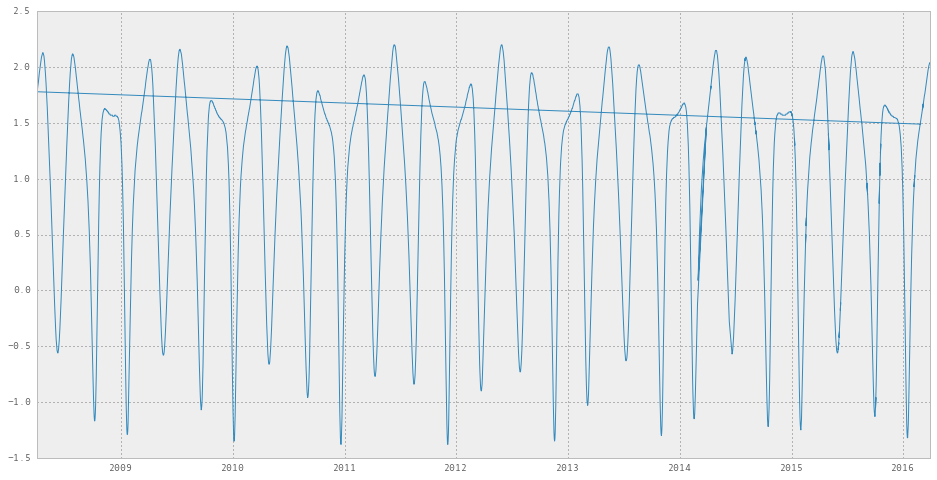

In [8]:
plt.figure(1,figsize=[16,8], dpi=144)
plt.plot(df1['Data'], df1['Mercury speed'])